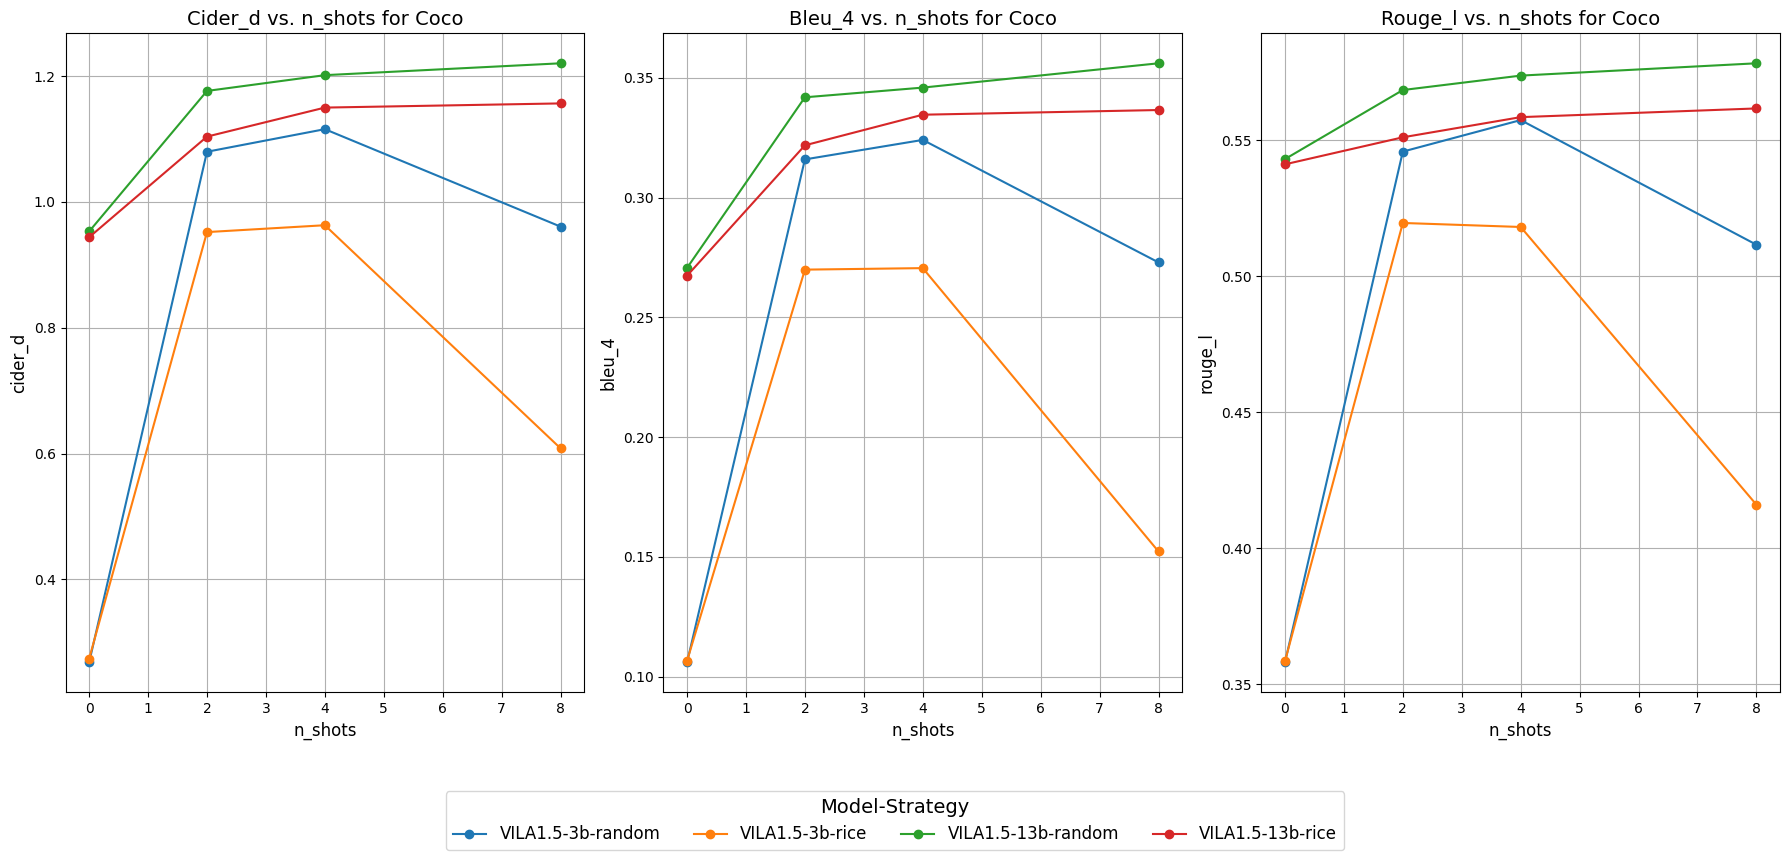

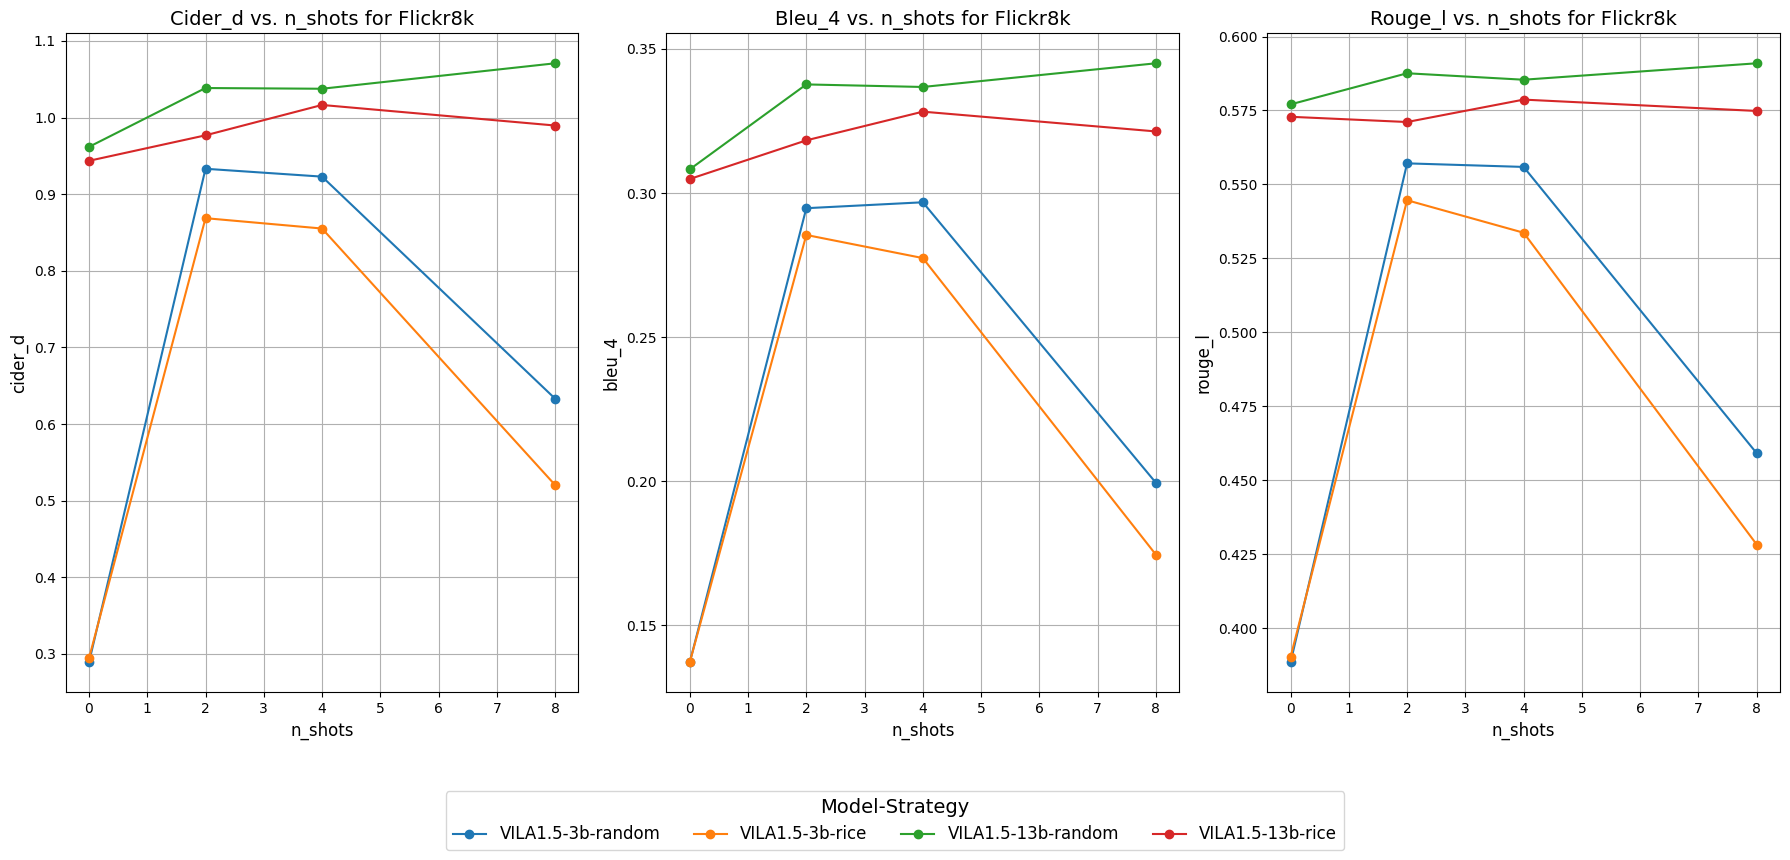

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics_subplots(dataset_names, model_names, strategy_names, metric_names, base_path):
    """
    Plot all metrics as subplots in a single figure for each dataset with larger font sizes and a bigger legend.

    Parameters:
    - dataset_names (list): List of dataset names (e.g., ["coco", "flickr8k"]).
    - model_names (list): List of model names (e.g., ["VILA1.5-3b", "VILA1.5-13b"]).
    - strategy_names (list): List of strategies (e.g., ["random", "rice"]).
    - metric_names (list): List of metric names (e.g., ["cider_d", "bleu_4", "rouge_l"]).
    - base_path (str): Path to the directory containing the CSV files.

    Returns:
    - None
    """
    for dataset in dataset_names:
        # Initialize a figure with subplots
        fig, axes = plt.subplots(1, len(metric_names), figsize=(6 * len(metric_names), 8))
        if len(metric_names) == 1:
            axes = [axes]  # Ensure axes is iterable for a single metric
        
        # Store handles and labels for a common legend
        handles, labels = [], []
        
        for i, metric in enumerate(metric_names):
            ax = axes[i]
            
            for model in model_names:
                for strategy in strategy_names:
                    # Construct the file path
                    strategy_str = "random" if strategy == "random" else "rice"
                    csv_path = f"{base_path}/{dataset}_{model}_{strategy_str}.csv"
                    
                    try:
                        # Read the CSV file
                        df = pd.read_csv(csv_path)
                        
                        # Plot the metric vs. n_shots
                        line, = ax.plot(
                            df['n_shots'], 
                            df[metric], 
                            marker='o', 
                            label=f"{model}-{strategy}"
                        )
                        
                        # Collect handles and labels for the common legend
                        if i == 0:  # Only collect once to avoid duplicates
                            handles.append(line)
                            labels.append(f"{model}-{strategy}")
                    except FileNotFoundError:
                        print(f"File not found: {csv_path}")
                        continue

            # Customize each subplot
            ax.set_title(f"{metric.capitalize()} vs. n_shots for {dataset.capitalize()}", fontsize=14)
            ax.set_xlabel("n_shots", fontsize=12)
            ax.set_ylabel(metric, fontsize=12)
            ax.tick_params(axis='both', which='major', labelsize=10)
            ax.grid(True)

        # Add a single legend below the plots
        fig.legend(
            handles=handles, 
            labels=labels, 
            loc='lower center', 
            ncol=4, 
            bbox_to_anchor=(0.5, -0.1), 
            title="Model-Strategy",
            fontsize=12,  # Font size for the legend text
            title_fontsize=14,  # Font size for the legend title
            borderaxespad=1.5  # Padding around the legend box
        )

        # Adjust layout to fit all subplots and the legend
        fig.tight_layout(rect=[0.0, 0.05, 1, 1])  # Reserve space for the legend
        plt.show()

# Example usage
dataset_names = ["coco", "flickr8k"]
model_names = ["VILA1.5-3b", "VILA1.5-13b"]
strategy_names = ["random", "rice"]
metric_names = ["cider_d", "bleu_4", "rouge_l"]
base_path = "/home/asureddy_umass_edu/cs682/metrics_results/captioning"

plot_metrics_subplots(dataset_names, model_names, strategy_names, metric_names, base_path)
